In [3]:
import pandas as pd

In [4]:
data = pd.read_pickle("04n1XDy49KKW430PKpARDW.pkl")
data.head(5)

,playlistID,TrackName,TrackID,SampleURL,ReleaseYear,Genres,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,duration_ms,Popularity
0,04n1XDy49KKW430PKpARDW,Scopin,7KmbiagSkUbepU88x7NWjb,https://p.scdn.co/mp3-preview/15e7ed8be1c7bc58...,2022-04-08,[drift phonk],0.809,0.972,-1.653,0.0616,0.06500,0.120000,0.0311,0.6410,98.013,8,1,101633,75.0
1,04n1XDy49KKW430PKpARDW,Flare,3hzelPptWzx0OrSDTyIuuy,https://p.scdn.co/mp3-preview/93be8fd767d2e16f...,2022-11-11,[drift phonk],0.723,0.927,-3.066,0.0766,0.16800,0.957000,0.2900,0.0347,150.030,4,1,151971,73.0
2,04n1XDy49KKW430PKpARDW,RAVE,01kfSdF9zfcDLri5sSWEoL,https://p.scdn.co/mp3-preview/cbdd5ab6c5ae0400...,2022-03-18,[drift phonk],0.716,0.748,-6.060,0.0356,0.23500,0.849000,0.1140,0.3380,119.918,8,1,169245,80.0
3,04n1XDy49KKW430PKpARDW,WORTH NOTHING - Fast & Furious: Drift Tape/Pho...,5Zlb01Jcn0Ld49zazzZJSB,https://p.scdn.co/mp3-preview/fc51118d4396999b...,2022-09-28,[unknown],0.604,0.601,-7.887,0.0628,0.15000,0.000579,0.1680,0.1560,139.880,2,0,164629,83.0
4,04n1XDy49KKW430PKpARDW,Slapper - Fast & Furious: Drift Tape/Phonk Vol 1,4Zf7vu8xsZeqOvel5fqyEK,https://p.scdn.co/mp3-preview/ee60c7cc5e9d8a67...,2022-12-16,[drift phonk],0.716,0.977,-5.408,0.0442,0.00522,0.812000,0.0747,0.6490,90.000,11,1,67030,62.0


In [5]:
# def f(x,y):
#     print(x, y)

# [f(x, y) for x, y in zip(data['TrackName'], data['Genres'])]

In [6]:
all_genre = set()
def combine_genre(gens):
    if type(gens) == str: # unknown
        return
    global all_genre
    for gen in gens:
        all_genre.add(gen)
result = [combine_genre(g) for g in data['Genres']]
all_genre = sorted(all_genre)

In [7]:
all_genre

['aesthetic rap',
 'alabama rap',
 'alt z',
 'alternative dance',
 'alternative r&b',
 'anime',
 'anime rock',
 'antiviral pop',
 'art pop',
 'art rock',
 'atl hip hop',
 'atl trap',
 'australian dance',
 'australian hip hop',
 'australian indie',
 'australian pop',
 'barbadian pop',
 'baroque pop',
 'bass music',
 'bass trap',
 'basshall',
 'bedroom soul',
 'big beat',
 'big room',
 'breakbeat',
 'brostep',
 'cali rap',
 'canadian contemporary r&b',
 'canadian hip hop',
 'canadian indigenous',
 'canadian indigenous hip hop',
 'canadian pop',
 'candy pop',
 'channel pop',
 'chicago rap',
 'chill beats',
 'chillstep',
 'classic city pop',
 'colombian pop',
 'complextro',
 'conscious hip hop',
 'dance pop',
 'dance-punk',
 'dancefloor dnb',
 'dancehall',
 'danish pop',
 'dark pop',
 'dark trap',
 'deep house',
 'deep tropical house',
 'desi hip hop',
 'desi pop',
 'desi trap',
 'detroit hip hop',
 'dfw rap',
 'dirty south rap',
 'downtempo',
 'drift phonk',
 'drill',
 'dutch edm',
 'dutc

In [8]:
# renaming some genres to better process them
for index in range(0, len(all_genre)):
    value = all_genre[index]
    if "hip hop" in str(value):
        value = value.replace("hip hop", "hip-hop")
    all_genre[index] = value

In [9]:
all_genre

['aesthetic rap',
 'alabama rap',
 'alt z',
 'alternative dance',
 'alternative r&b',
 'anime',
 'anime rock',
 'antiviral pop',
 'art pop',
 'art rock',
 'atl hip-hop',
 'atl trap',
 'australian dance',
 'australian hip-hop',
 'australian indie',
 'australian pop',
 'barbadian pop',
 'baroque pop',
 'bass music',
 'bass trap',
 'basshall',
 'bedroom soul',
 'big beat',
 'big room',
 'breakbeat',
 'brostep',
 'cali rap',
 'canadian contemporary r&b',
 'canadian hip-hop',
 'canadian indigenous',
 'canadian indigenous hip-hop',
 'canadian pop',
 'candy pop',
 'channel pop',
 'chicago rap',
 'chill beats',
 'chillstep',
 'classic city pop',
 'colombian pop',
 'complextro',
 'conscious hip-hop',
 'dance pop',
 'dance-punk',
 'dancefloor dnb',
 'dancehall',
 'danish pop',
 'dark pop',
 'dark trap',
 'deep house',
 'deep tropical house',
 'desi hip-hop',
 'desi pop',
 'desi trap',
 'detroit hip-hop',
 'dfw rap',
 'dirty south rap',
 'downtempo',
 'drift phonk',
 'drill',
 'dutch edm',
 'dutc

In [10]:
# find out common overlapping genres
common_genres = set()
common_genres_count = dict()

def check_sim(first: str, second: str):
    if first == second:
        return
    split_first = set(first.split(" "))
    split_second = set(second.split(" "))
    common = split_first.intersection(split_second)
    if len(common) != 0:
        sim_factor = len(common) / (min(len(split_first), len(split_second)))
        if sim_factor > 0.5 :
            common_genres.add(" ".join(common))
            if " ".join(common) in common_genres_count.keys():
                common_genres_count[" ".join(common)] += 1
            else:
                common_genres_count[" ".join(common)] = 0

for genre_1 in all_genre:
    for genre_2 in all_genre:
        check_sim(genre_1, genre_2)

In [11]:
common_genres

{'anime',
 'city pop',
 'contemporary r&b',
 'dance pop',
 'deep house',
 'drill',
 'edm',
 'electro',
 'electropop',
 'group k-pop',
 'hip-hop',
 'hip-hop canadian',
 'hip-hop old school',
 'house',
 'house electro',
 'house progressive',
 'house tropical',
 'indie pop',
 'indigenous canadian',
 'k-pop',
 'modern pop',
 'pop',
 'r&b',
 'rap',
 'rap pop',
 'reggaeton',
 'rock',
 'trap',
 'viral pop'}

In [12]:
# sort by value
common_genres_count = dict(sorted(common_genres_count.items(), key=lambda item: item[1], reverse=True))
common_genres_count

{'pop': 95,
 'hip-hop': 59,
 'rap': 39,
 'house': 19,
 'trap': 17,
 'r&b': 11,
 'rock': 11,
 'edm': 7,
 'drill': 5,
 'electropop': 5,
 'indie pop': 5,
 'k-pop': 5,
 'electro': 3,
 'anime': 1,
 'contemporary r&b': 1,
 'hip-hop canadian': 1,
 'indigenous canadian': 1,
 'city pop': 1,
 'dance pop': 1,
 'deep house': 1,
 'house tropical': 1,
 'house electro': 1,
 'rap pop': 1,
 'hip-hop old school': 1,
 'group k-pop': 1,
 'modern pop': 1,
 'house progressive': 1,
 'reggaeton': 1,
 'viral pop': 1}

In [13]:
genre_mapping = {} # genre: list of True / False
def generate_series(genre: str):
    mapping = []
    def gen_map(track, genres):
        if (type(genres) == str): #unknown
            return
        mapping.append(genre in " ".join(genres))
    
    [gen_map(x, y) for x, y in zip(data['TrackName'], data['Genres'])]
    genre_mapping[genre] = mapping

In [14]:
for index in range (0, 10):
    generate_series(list(common_genres_count.keys())[index])

In [15]:
genre_mapping

{'pop': [False,
  False,
  False,
  False,
  True,
  False,
  True,
  True,
  True,
  False,
  True,
  False,
  False,
  True,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  False,
  False,
  True,
  False,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  False,
  False,
  True,
  True,
  False,
  True,
  False,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  True,
  True,
  Tr

In [16]:
mapped_genre_data = pd.DataFrame(genre_mapping)

In [17]:
mapped_genre_data

,pop,hip-hop,rap,house,trap,r&b,rock,edm,drill,electropop
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
541,True,False,True,False,True,False,False,True,False,False
542,True,False,False,True,False,False,False,True,False,True
543,True,False,True,False,False,False,False,True,False,False
544,True,False,False,False,False,True,False,False,False,False


In [27]:
WINDOW_SIZE = 10

In [28]:
def count_true(data: list) -> int:
    count = 0
    for elem in data:
        if elem:
            count += 1
    return count

pop_count = []
pop_index = []
for i in range(0, len(data), WINDOW_SIZE):
    pop_index.append(i)
    pop_count.append(count_true(mapped_genre_data['pop'][i:i + WINDOW_SIZE]))

Plot after re-sizing: 


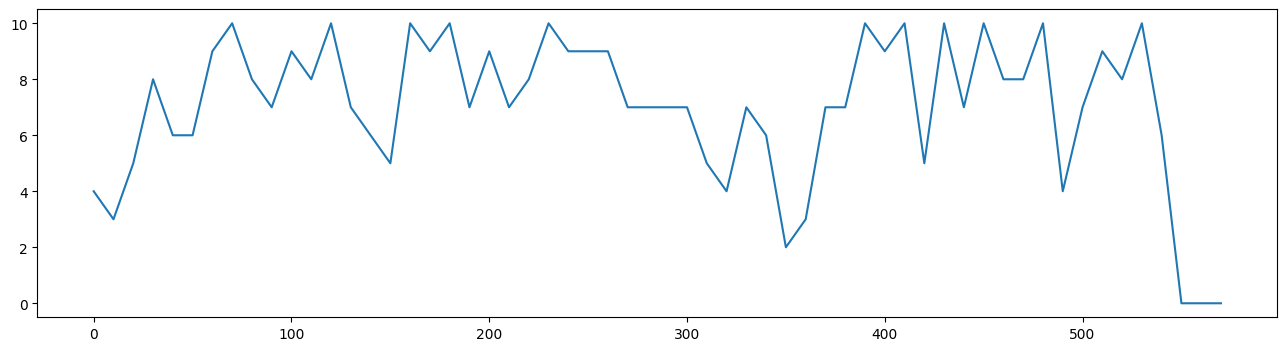

In [29]:
import matplotlib.pyplot as plt

 
# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(4)
  
print("Plot after re-sizing: ")
plt.plot(pop_index, pop_count)
plt.show()